In [ ]:
import numpy as np
import pandas as pd

from utils.simulation_utils import generate_dataset  # your safe version
from training.trainer_trials import random_policy_trainer_trial
from utils.plots_and_stats  import compute_statistics_and_plots
import importlib

In [ ]:
import utils, training
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
importlib.reload(utils.simulation_utils)
importlib.reload(training.trainer_trials)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'training.trainer_trials' from '/home/roee/Documents/git-repos/OPC/training/trainer_trials.py'>

In [ ]:
params = {
    "n_users": 25_000,
    "n_actions": 25_000,
    "emb_dim": 32,
    "eps": 0.2,
    "ctr": 0.02,   # used by env / optional
}

dataset = generate_dataset(
    params=params,
    seed=12345,
    emb_a='/home/roee/Documents/git-repos/OPC/BPR/embeddings/lastfm_item_factors.npy',
    emb_x='/home/roee/Documents/git-repos/OPC/BPR/embeddings/lastfm_user_factors.npy',
    materialize_q_x_a=False,   # CRITICAL
    dtype=np.float32,          # CRITICAL
    store_original=False,      # saves RAM
    make_user_prior=False      # saves RAM
)

print("Dataset keys:", dataset.keys())
print("our_x:", dataset["our_x"].shape, dataset["our_x"].dtype)
print("our_a:", dataset["our_a"].shape, dataset["our_a"].dtype)


Dataset keys: dict_keys(['emb_a', 'our_a', 'emb_x', 'our_x', 'n_actions', 'n_users', 'emb_dim', 'env'])
our_x: (358868, 32) float32
our_a: (292385, 32) float32


Simulation time for 60000 samples: 3.4259796142578125 seconds
[Regression] fit time: 0.18s


ESS=73.0339, (Max wi, Min_wi)=(1.19, 0.00) value=0.5287 ± 0.0003, r_actual=0.5307: 100%|██████████| 10/10 [03:24<00:00, 20.42s/it]


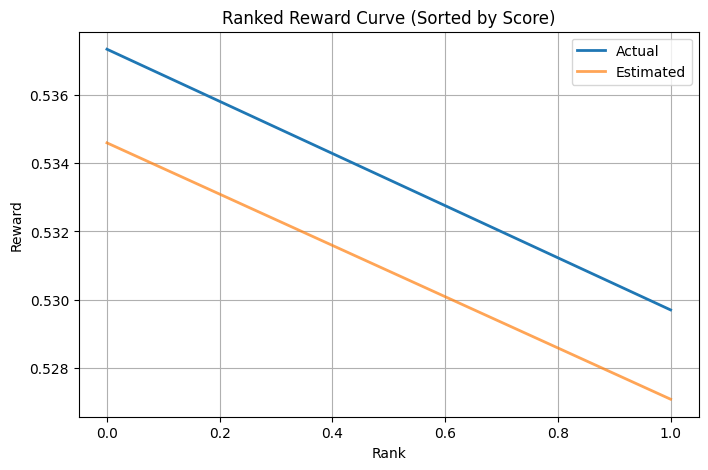

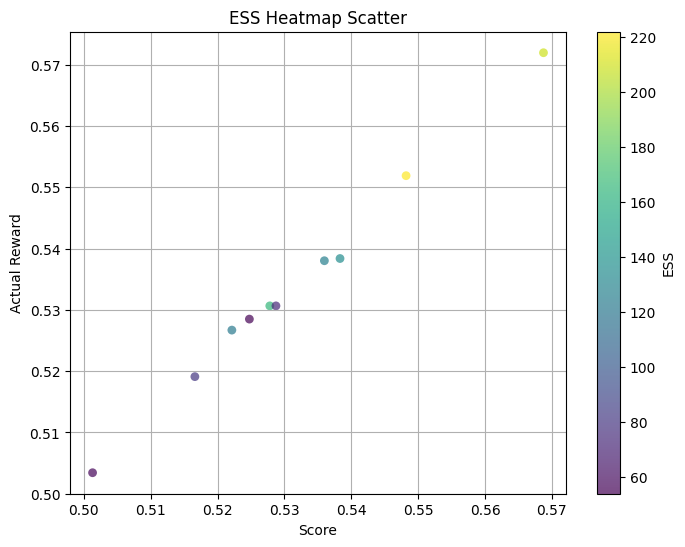

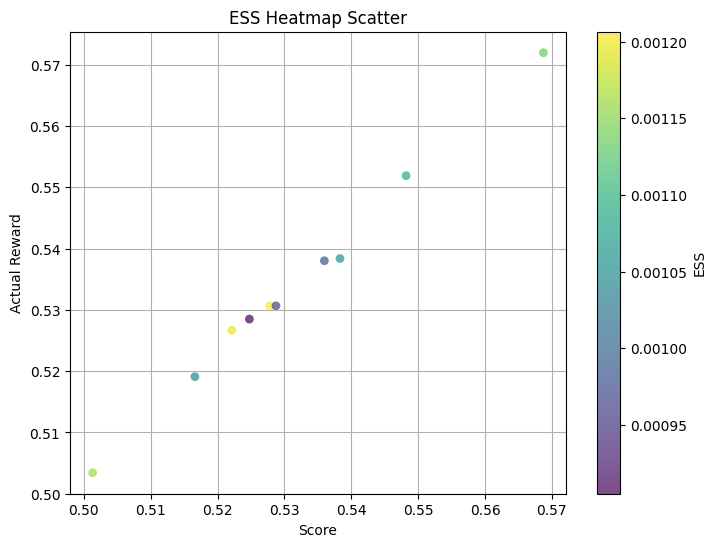

Correlation Metrics: {'pearson_score_actual': np.float64(0.9976908162713752), 'spearman_score_actual': np.float64(0.996965091635306), 'spearman_est_actual': np.float64(0.996965091635306)}
NDCG Metrics: {'ndcg_score_actual': np.float64(1.0), 'ndcg_est_actual': np.float64(1.0)}
Error Metrics: {'mean_error': np.float64(0.0021093786771287258), 'mae': np.float64(0.0022167450733252547), 'rmse': np.float64(0.0024230292980857437), 'std_error': np.float64(0.0011923055715111616), 'max_error': np.float64(0.0040957178066091116), 'min_error': np.float64(-0.0005368319809826438)}


In [ ]:
df, df_all = random_policy_trainer_trial(
    train_size=50_000,      # logged samples to fit regression
    dataset=dataset,
    n_policies=10,          # how many candidate policies to score
    val_size=10_000,        # logged samples to evaluate
    use_random=True,
    use_oracle=True,
    jaws=False,

    # policy sampling controls
    K_candidates=512,       # candidate set size (controls speed/variance)

    # scoring controls (reduce first; increase later)
    n_bootstrap=200,
    n_dm_mc=32,

    seed=12345,
)

compute_statistics_and_plots(df)

Simulation time for 6000 samples: 0.3405163288116455 seconds
[Regression] fit time: 0.01s


ESS=16.6839, (Max wi, Min_wi)=(0.15, 0.00) value=0.5739 ± 0.0019, r_actual=0.5716: 100%|██████████| 100/100 [02:46<00:00,  1.67s/it]


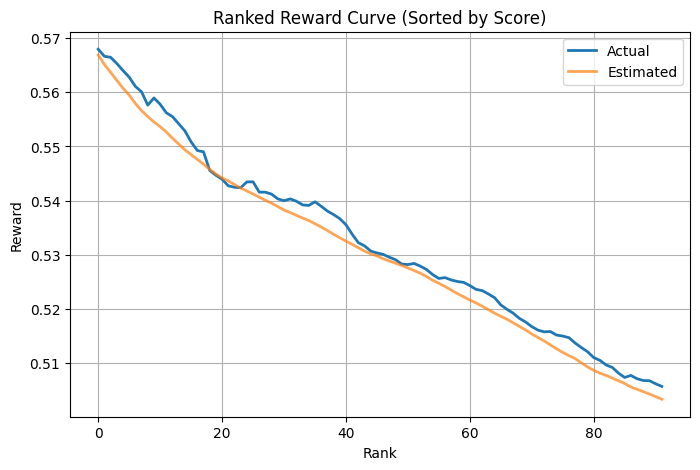

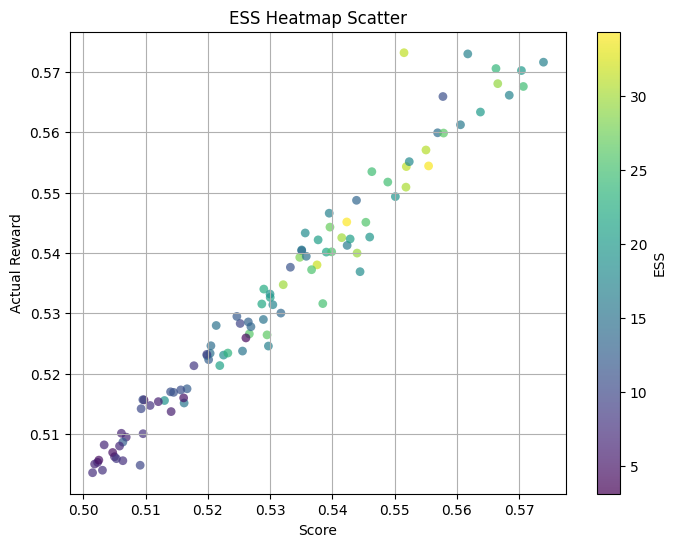

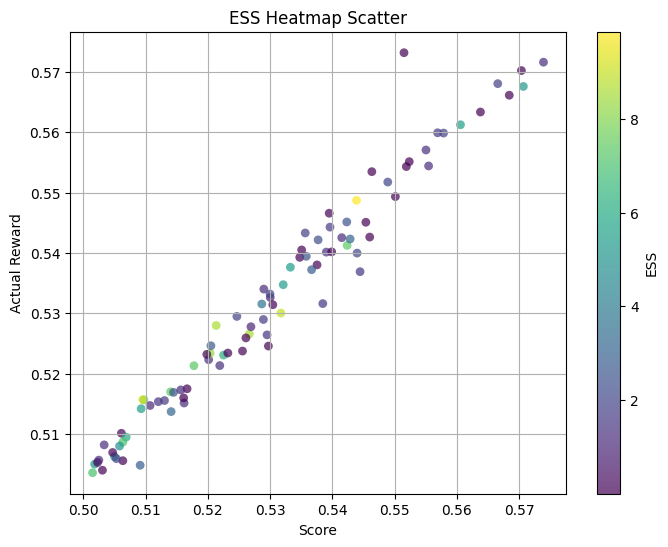

Correlation Metrics: {'pearson_score_actual': np.float64(0.9814941403373466), 'spearman_score_actual': np.float64(0.9825982598259825), 'spearman_est_actual': np.float64(0.9825982598259825)}
NDCG Metrics: {'ndcg_score_actual': np.float64(0.9993867526947247), 'ndcg_est_actual': np.float64(0.9993867438610395)}
Error Metrics: {'mean_error': np.float64(-0.0012590390308351075), 'mae': np.float64(0.002750277962541561), 'rmse': np.float64(0.0038953378294800233), 'std_error': np.float64(0.003686255216966391), 'max_error': np.float64(0.018288619322453403), 'min_error': np.float64(-0.011169765457469616)}


In [ ]:
df, df_all = random_policy_trainer_trial(
    train_size=50_00,      # logged samples to fit regression
    dataset=dataset,
    n_policies=100,          # how many candidate policies to score
    val_size=10_00,        # logged samples to evaluate
    use_random=True,
    use_oracle=True,
    jaws=False,

    # policy sampling controls
    K_candidates=512,       # candidate set size (controls speed/variance)

    # scoring controls (reduce first; increase later)
    n_bootstrap=200,
    n_dm_mc=32,

    seed=12345,
)

compute_statistics_and_plots(df)

Simulation time for 600 samples: 0.031063079833984375 seconds
[Regression] fit time: 0.00s


ESS=1.9431, (Max wi, Min_wi)=(0.15, 0.00) value=0.5724 ± 0.0110, r_actual=0.5743: 100%|██████████| 100/100 [00:20<00:00,  4.93it/s]


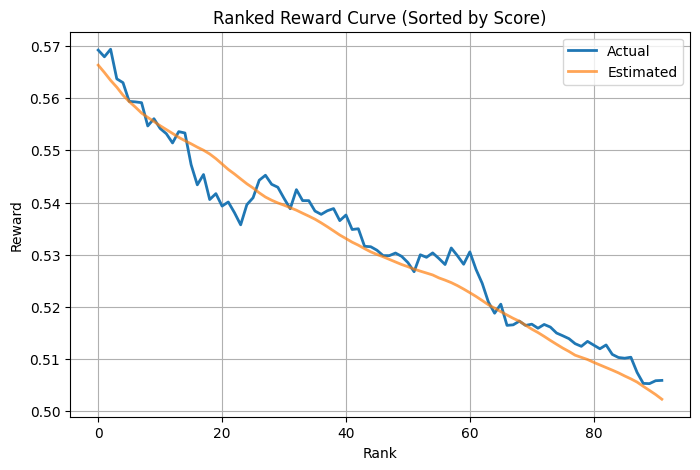

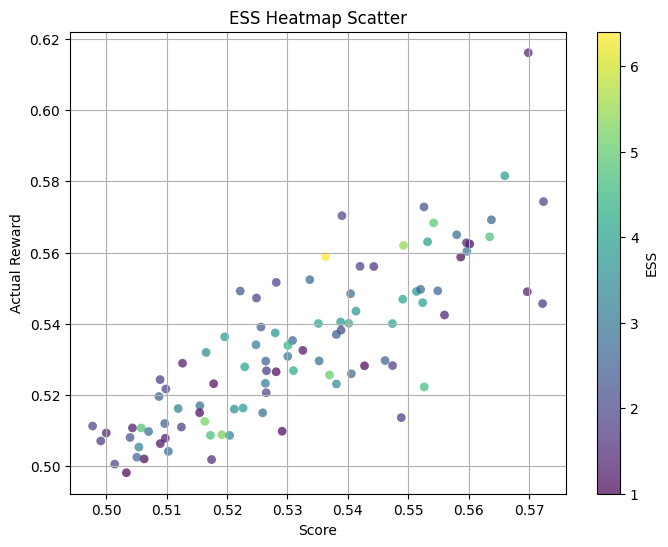

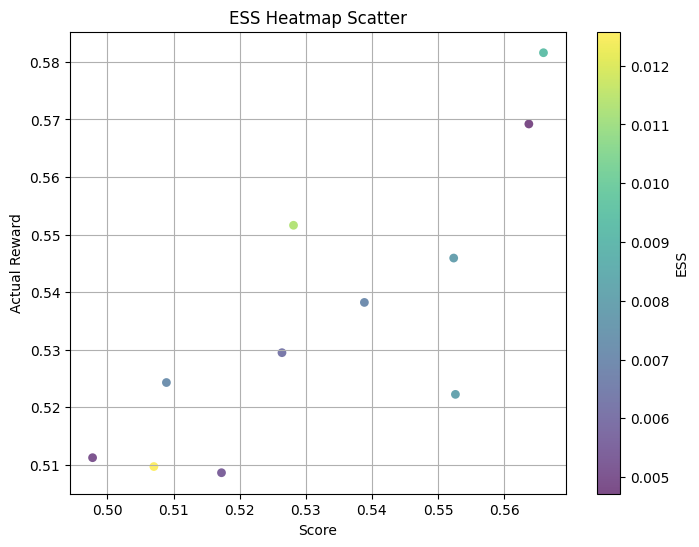

Correlation Metrics: {'pearson_score_actual': np.float64(0.8192628863151168), 'spearman_score_actual': np.float64(0.83006300630063), 'spearman_est_actual': np.float64(0.8363036303630362)}
NDCG Metrics: {'ndcg_score_actual': np.float64(0.9945510317414386), 'ndcg_est_actual': np.float64(0.9941057940828804)}
Error Metrics: {'mean_error': np.float64(-0.02191713479371839), 'mae': np.float64(0.02261666571164689), 'rmse': np.float64(0.025246731275929704), 'std_error': np.float64(0.012531426197882898), 'max_error': np.float64(0.024503011226676086), 'min_error': np.float64(-0.058263661838871994)}


In [10]:
df, df_all = random_policy_trainer_trial(
    train_size=50_0,      # logged samples to fit regression
    dataset=dataset,
    n_policies=100,          # how many candidate policies to score
    val_size=10_0,        # logged samples to evaluate
    use_random=True,
    use_oracle=True,
    jaws=False,

    # policy sampling controls
    K_candidates=512,       # candidate set size (controls speed/variance)

    # scoring controls (reduce first; increase later)
    n_bootstrap=200,
    n_dm_mc=32,

    seed=12345,
)

compute_statistics_and_plots(df)

In [ ]:
k